In [5]:
%matplotlib notebook

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from pandas import DataFrame
import urllib
%matplotlib inline
plt.style.use('ggplot')

In [6]:
df = pd.read_csv("311_service_requests_2017.csv", dtype=object) 

In [7]:
df['open_dt'] = pd.to_datetime(df['open_dt'], errors='coerce')

In [8]:
df.head()

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
0,101001979518,2017-01-01 00:33:05,2017-01-04 08:30:00,2017-01-02 23:48:15,ONTIME,Closed,Case Closed. Closed date : 2017-01-02 23:48:15...,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,C6,South Boston / South Boston Waterfront,5,Ward 6,0609,911 E Broadway,02127,42.3356,-71.0275,Citizens Connect App
1,101001979520,2017-01-01 01:22:52,2017-01-04 08:30:00,2017-01-02 23:52:13,ONTIME,Closed,Case Closed. Closed date : 2017-01-02 23:52:13...,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,E13,Jamaica Plain,11,19,1909,INTERSECTION Centre St & South St,NaN,42.3594,-71.0587,Citizens Connect App
2,101001979521,2017-01-01 01:24:00,2017-01-18 08:30:00,2017-01-05 15:10:54,ONTIME,Closed,Case Closed. Closed date : 2017-01-05 15:10:54...,PRINTED : Street light out RT,Public Works Department,Street Lights,...,E13,Jamaica Plain,11,19,1906,20 Alveston St,02130,42.3104,-71.1121,Citizens Connect App
3,101001979523,2017-01-01 02:24:00,2017-03-09 08:30:00,2017-01-09 08:09:05,ONTIME,Closed,Case Closed. Closed date : 2017-01-09 08:09:05...,Graffiti Removal,Property Management,Graffiti,...,D4,Roxbury,13,09,0904,1002-1004 Tremont St,02120,42.3368,-71.0846,Citizens Connect App
4,101001979524,2017-01-01 02:27:00,2017-01-31 02:27:26,NaN,OVERDUE,Open,,Heat - Excessive Insufficient,Inspectional Services,Housing,...,B2,Dorchester,13,Ward 13,1305,65 Monadnock St,02125,42.3149,-71.0697,Constituent Call


In [9]:
leaflet1 = df[["type","latitude","longitude"]]

In [10]:
leaflet2 = leaflet1.loc[df['type'].isin([ 'Loud Parties/Music/People', 'Dumpster & Loading Noise Disturbances' , 'Work Hours-Loud Noise Complaints' , 'Undefined Noise Disturbance' , 'Automotive Noise Disturbance'])]


In [11]:
leaflet2.head()

,type,latitude,longitude
109,Loud Parties/Music/People,42.2629,-71.1163
2200,Dumpster & Loading Noise Disturbances,42.3468,-71.1057
3586,Work Hours-Loud Noise Complaints,42.3457,-71.0863
4907,Undefined Noise Disturbance,42.3594,-71.0587
5746,Work Hours-Loud Noise Complaints,42.3448,-71.0664


In [12]:
leaflet2.to_csv(("Noise_LatLong"))

In [13]:
df1 = df[["open_dt","type"]]

In [14]:
df1.head()

,open_dt,type
0,2017-01-01 00:33:05,Parking Enforcement
1,2017-01-01 01:22:52,Parking Enforcement
2,2017-01-01 01:24:00,Street Light Outages
3,2017-01-01 02:24:00,Graffiti Removal
4,2017-01-01 02:27:00,Heat - Excessive Insufficient


In [15]:
df1.type.unique()

array(['Parking Enforcement', 'Street Light Outages', 'Graffiti Removal',
       'Heat - Excessive  Insufficient', 'Schedule a Bulk Item Pickup',
       'Traffic Signal Inspection', 'Requests for Street Cleaning',
       'Notification', 'Aircraft Noise Disturbance',
       'Poor Conditions of Property', 'Sign Repair',
       'Missed Trash/Recycling/Yard Waste/Bulk Item',
       'Pick up Dead Animal', 'Schedule a Bulk Item Pickup SS',
       'Improper Storage of Trash (Barrels)', 'Needle Pickup',
       'Ground Maintenance', 'Abandoned Vehicles', 'Empty Litter Basket',
       'PWD Graffiti', 'Street Light Knock Downs', 'Equipment Repair',
       'Animal Generic Request', 'Sidewalk Repair (Make Safe)',
       'New Sign  Crosswalk or Pavement Marking', 'Abandoned Bicycle',
       'Tree Maintenance Requests', 'Request for Pothole Repair',
       'Rodent Activity', 'Loud Parties/Music/People',
       'Request for Snow Plowing', 'Illegal Occupancy',
       'Unsafe Dangerous Conditions', 'Pes

In [16]:
month = df['Month'] = df['open_dt'].dt.month

In [17]:
month.head()

0    1
1    1
2    1
3    1
4    1
Name: open_dt, dtype: int64

In [18]:
final = pd.merge(df1, month, left_index=True, right_index=True)

In [19]:
final.head()

,open_dt_x,type,open_dt_y
0,2017-01-01 00:33:05,Parking Enforcement,1
1,2017-01-01 01:22:52,Parking Enforcement,1
2,2017-01-01 01:24:00,Street Light Outages,1
3,2017-01-01 02:24:00,Graffiti Removal,1
4,2017-01-01 02:27:00,Heat - Excessive Insufficient,1


In [20]:
df = final[["type", "open_dt_y"]]

In [21]:
df

,type,open_dt_y
0,Parking Enforcement,1
1,Parking Enforcement,1
2,Street Light Outages,1
3,Graffiti Removal,1
4,Heat - Excessive Insufficient,1
5,Schedule a Bulk Item Pickup,1
6,Traffic Signal Inspection,1
7,Parking Enforcement,1
8,Requests for Street Cleaning,1
9,Parking Enforcement,1


In [22]:
df_2 = df.loc[df['type'].isin([ 'Loud Parties/Music/People', 'Dumpster & Loading Noise Disturbances' , 'Work Hours-Loud Noise Complaints' , 'Undefined Noise Disturbance' , 'Automotive Noise Disturbance'])]


In [23]:
df_2

,type,open_dt_y
109,Loud Parties/Music/People,1
2200,Dumpster & Loading Noise Disturbances,1
3586,Work Hours-Loud Noise Complaints,1
4907,Undefined Noise Disturbance,1
5746,Work Hours-Loud Noise Complaints,1
6910,Loud Parties/Music/People,1
7163,Work Hours-Loud Noise Complaints,1
7173,Dumpster & Loading Noise Disturbances,1
7202,Work Hours-Loud Noise Complaints,1
7591,Loud Parties/Music/People,1


In [24]:
groupby_df = df_2.groupby('open_dt_y').count()
groupby_df

,type
open_dt_y,
1,43
2,47
3,35
4,61
5,59
6,34
7,43
8,68
9,73


<IPython.core.display.Javascript object>


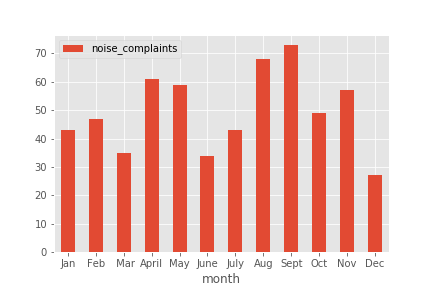

In [31]:
df = pd.DataFrame({'month':['Jan', 'Feb', ' Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 'noise_complaints':[43, 47, 35, 61, 59, 34, 43, 68, 73, 49, 57, 27]})
ax = df.plot.bar(x='month', y='noise_complaints', rot=0)

In [32]:
df.to_csv('noise_monthly.csv')